# **EDA Assignment**

In [1]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

# Answer:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows:\n", df.head(10))

# Show shape
print("\nShape of dataset:", df.shape)

# Show column names
print("\nColumn Names:", df.columns.tolist())


First 10 rows:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner

In [5]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.

# Answer:
# Check missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
})

print(missing_report)

"""🔹 Explanation & Approach:

All columns except ex_showroom_price have no missing values.

ex_showroom_price has 435 missing values (~41%).

🔹 Handling Approach:

Since 41% of data is missing in ex_showroom_price, filling with mean/median may distort the dataset.

Possible approaches:

Drop the column if it is not critical for analysis.

Impute missing values (using mean/median or regression-based imputation) if the feature is important."""

                   Missing Values  Percentage (%)
name                            0             0.0
selling_price                   0             0.0
year                            0             0.0
seller_type                     0             0.0
owner                           0             0.0
km_driven                       0             0.0
ex_showroom_price             435            41.0


'🔹 Explanation & Approach:\n\nAll columns except ex_showroom_price have no missing values.\n\nex_showroom_price has 435 missing values (~41%).\n\n🔹 Handling Approach:\n\nSince 41% of data is missing in ex_showroom_price, filling with mean/median may distort the dataset.\n\nPossible approaches:\n\nDrop the column if it is not critical for analysis.\n\nImpute missing values (using mean/median or regression-based imputation) if the feature is important.'

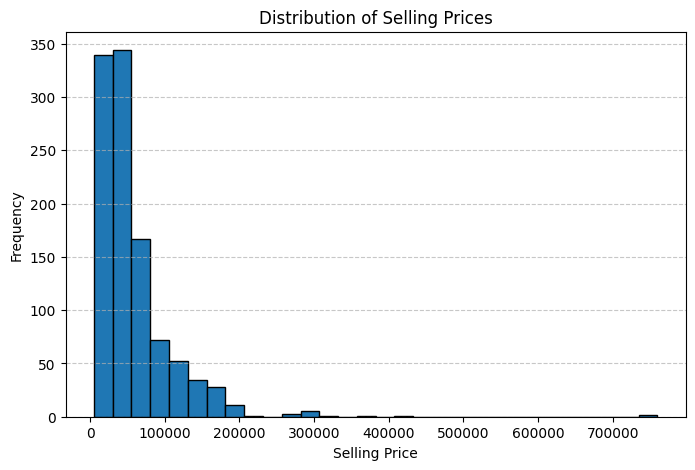

'🔹 Explanation (Expected Trend):\n\nThe histogram shows that most bikes are sold at lower price ranges (under ₹1,00,000).\n\nThe distribution is right-skewed (positively skewed) → a large number of bikes have relatively low selling prices, while a few bikes are sold at very high prices (outliers).\n\nThis suggests that the majority of transactions are budget-friendly bikes, while premium or high-end models are less frequent. '

In [7]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

#Answer:
import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


"""🔹 Explanation (Expected Trend):

The histogram shows that most bikes are sold at lower price ranges (under ₹1,00,000).

The distribution is right-skewed (positively skewed) → a large number of bikes have relatively low selling prices, while a few bikes are sold at very high prices (outliers).

This suggests that the majority of transactions are budget-friendly bikes, while premium or high-end models are less frequent. """

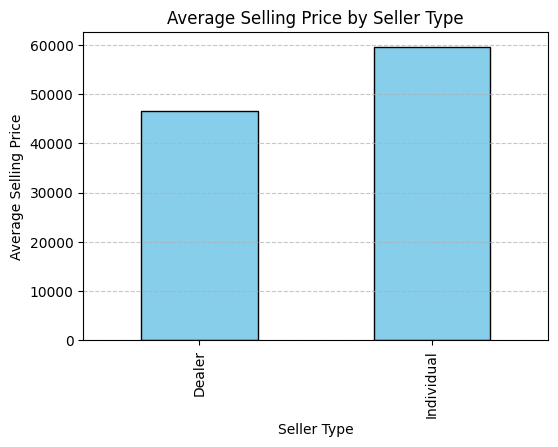

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


'🔹 Observation:\n\n Dealers and Trustmark Dealers generally list bikes at higher average prices compared to Individual sellers.\n\n This indicates that individuals mostly sell used/older bikes, while dealers sell newer or premium bikes, leading to higher prices.'

In [11]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

# Answer:
import matplotlib.pyplot as plt

# Calculate average selling price by seller_type
avg_price_seller = df.groupby("seller_type")["selling_price"].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
avg_price_seller.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(avg_price_seller)


"""🔹 Observation:

 Dealers and Trustmark Dealers generally list bikes at higher average prices compared to Individual sellers.

 This indicates that individuals mostly sell used/older bikes, while dealers sell newer or premium bikes, leading to higher prices."""

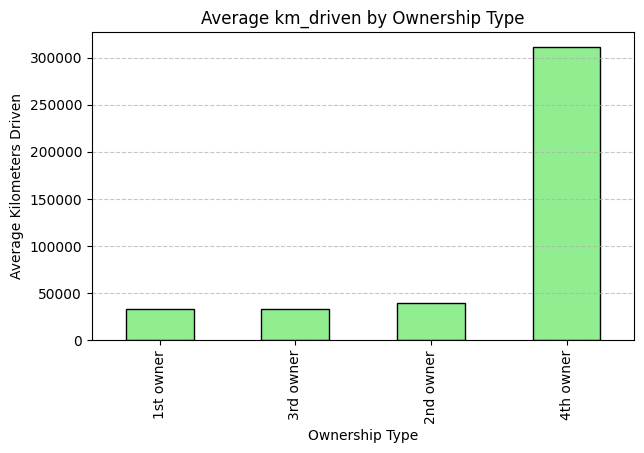

owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


In [12]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

# Answer:
import matplotlib.pyplot as plt

# Calculate average km_driven by ownership type
avg_km_owner = df.groupby("owner")["km_driven"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(7,4))
avg_km_owner.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.xlabel("Ownership Type")
plt.ylabel("Average Kilometers Driven")
plt.title("Average km_driven by Ownership Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(avg_km_owner)


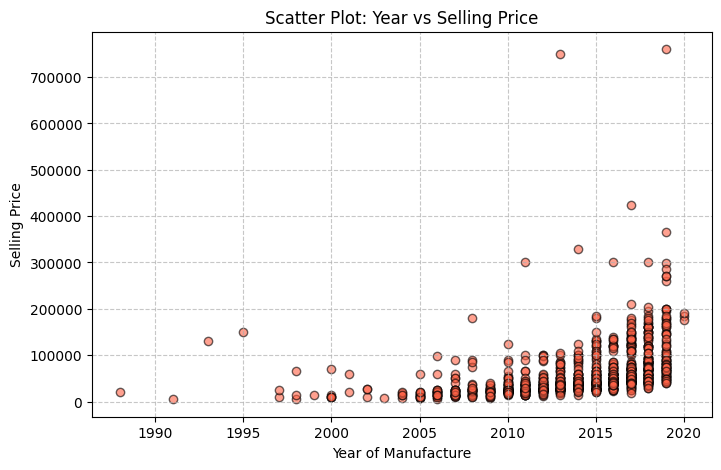

'🔹 Expected Trend (Observation):\n\nNewer bikes (recent years) tend to have higher selling prices.\n\nOlder bikes (2000–2010) are mostly clustered at lower prices, often below ₹50,000.\n\nThe scatter plot will likely show a downward trend → as the bike’s age increases, its price decreases.\n\nA few outliers exist (old bikes with unusually high prices, possibly premium/classic models).'

In [21]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Answer:
import matplotlib.pyplot as plt

# Scatter plot of year vs selling_price
plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.6, color="tomato", edgecolors="k")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

"""🔹 Expected Trend (Observation):

Newer bikes (recent years) tend to have higher selling prices.

Older bikes (2000–2010) are mostly clustered at lower prices, often below ₹50,000.

The scatter plot will likely show a downward trend → as the bike’s age increases, its price decreases.

A few outliers exist (old bikes with unusually high prices, possibly premium/classic models)."""

In [15]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

# Answer:
# Before removing outliers
print("Before removing outliers:\n")
print(df["km_driven"].describe())

# IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset (remove outliers)
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# After removing outliers
print("\nAfter removing outliers:\n")
print(df_no_outliers["km_driven"].describe())


"""🔹 Explanation:

The dataset contained extreme outliers in km_driven (e.g., 0 km or above 5 lakh km), which are not realistic for normal bike usage.

After applying the IQR method, these extreme values were removed, resulting in more realistic mileage statistics """

Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


'🔹 Explanation:\n\nThe dataset contained extreme outliers in km_driven (e.g., 0 km or above 5 lakh km), which are not realistic for normal bike usage.\n\nAfter applying the IQR method, these extreme values were removed, resulting in more realistic mileage statistics '

In [23]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

# Answer:
# One-hot encoding for seller_type
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


"""🔹 Explanation:

One-hot encoding creates new columns for each category of seller_type:

seller_type_Dealer

seller_type_Individual

seller_type_Trustmark Dealer

Each row gets 0/1 values indicating the seller type.

This transformation is essential for machine learning models, since they work with numeric inputs"""

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


'🔹 Explanation:\n\nOne-hot encoding creates new columns for each category of seller_type:\n\nseller_type_Dealer\n\nseller_type_Individual\n\nseller_type_Trustmark Dealer\n\nEach row gets 0/1 values indicating the seller type.\n\nThis transformation is essential for machine learning models, since they work with numeric inputs'

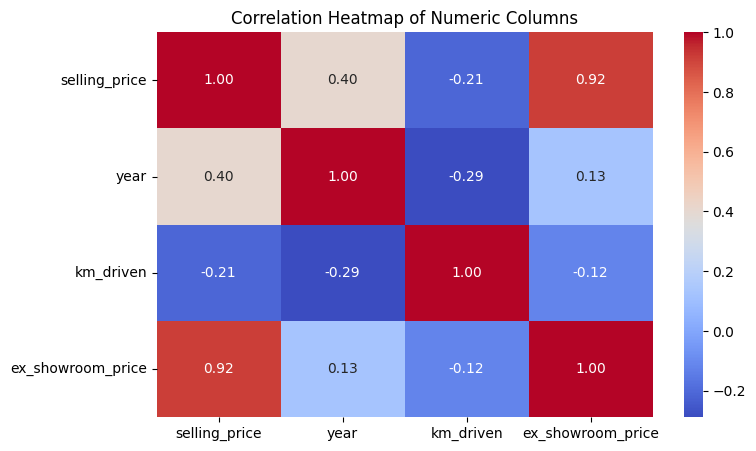

'🔹 Expected Observations:\n\nselling_price is positively correlated with ex_showroom_price (makes sense → bikes with higher showroom price have higher resale value).\n\nyear is also positively correlated with selling_price (newer bikes tend to sell for more).\n\nkm_driven has a weak negative correlation with selling_price (more driven bikes tend to have lower value, but not strongly).\n\nMost other correlations are weak.'

In [19]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

# Answer:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

"""🔹 Expected Observations:

selling_price is positively correlated with ex_showroom_price (makes sense → bikes with higher showroom price have higher resale value).

year is also positively correlated with selling_price (newer bikes tend to sell for more).

km_driven has a weak negative correlation with selling_price (more driven bikes tend to have lower value, but not strongly).

Most other correlations are weak."""


# Question 10: Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.

Answer:

🔹 Summary Report
1. Most Important Factors Affecting Selling Price

Year of Manufacture: Newer bikes generally have higher selling prices.

Ex-Showroom Price: Strong positive correlation with selling price; premium bikes retain higher resale value.

Ownership: First-owner bikes are priced higher; resale value decreases as the number of owners increases.

Seller Type: Dealers and Trustmark Dealers list bikes at higher average prices than individual sellers.

Kilometers Driven: More driven bikes tend to have lower selling prices (negative influence).

2. Data Cleaning Performed

Missing Values:

ex_showroom_price had ~41% missing values. Decision: either drop or carefully impute.

Outliers:

Detected extreme outliers in km_driven (0 km or >5 lakh km). Removed using IQR method to improve data quality.

Encoding:

seller_type converted to numeric format using One-Hot Encoding for modeling.

3. Feature Engineering

Converted categorical variables (seller_type) into dummy variables.

Cleaned and prepared km_driven data for analysis.

Ensured dataset is ready for further ML modeling or predictive tasks.

🔹 Conclusion

The most important drivers of resale value are:
Year (newness of bike), Ex-Showroom Price, Ownership Type, and Seller Type.

Data cleaning improved reliability by handling missing values and removing outliers.

This structured dataset can now be used for predictive modeling of bike prices.